In [65]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import lightkurve as lk
from lightkurve import periodogram

In [86]:
#Download pixel file of target
pixfile = lk.search_targetpixelfile("TIC 375506058", mission='TESS').download()  #Example: "KIC 8462852"

#"TIC 154872375"

/Users/Sophieslaptop/Documents/Grad_school/instrumentation/.venv/lib/python3.11/site-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 22 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


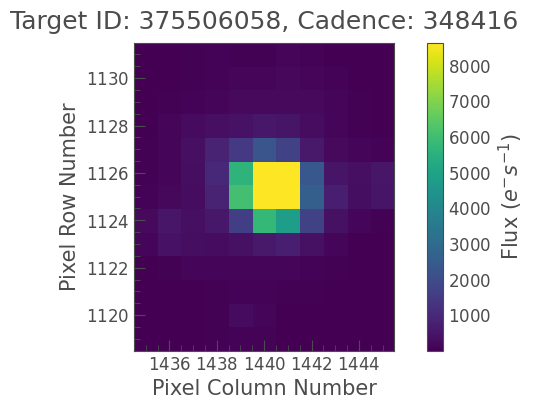

In [87]:
pixfile.plot(frame=1)
plt.show()

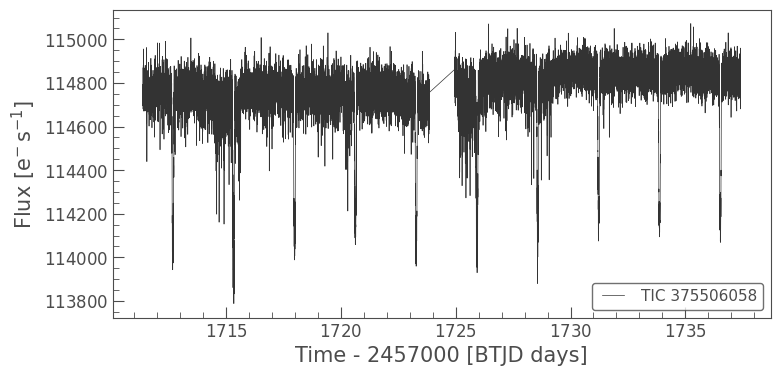

In [123]:
#Get lightcurve from data
lc = pixfile.to_lightcurve(aperture_mask=pixfile.pipeline_mask)
lc.plot()
plt.show()

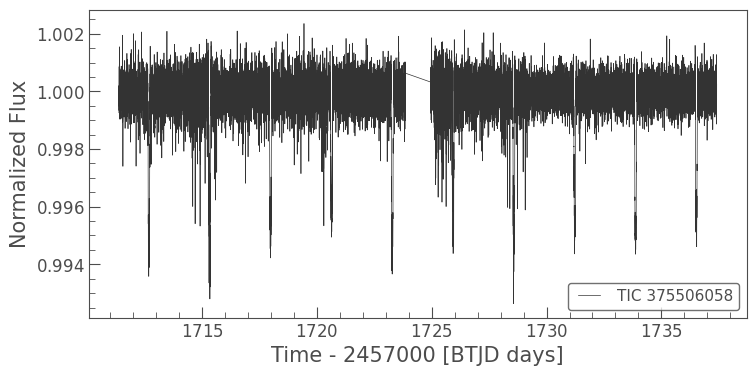

In [124]:
#Flatten to remove offset between data sets
flatlc = lc.flatten()
flatlc.plot()
plt.show()

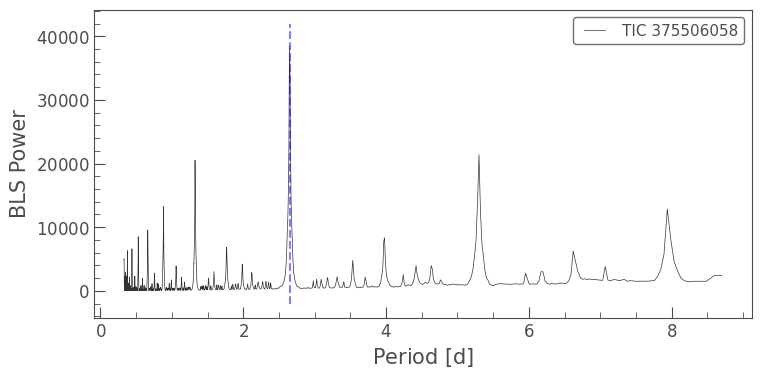

Period where power is max:  2.6504294074088195 d
Epoch:  1712.6770163050617


In [ ]:
#Create and plot periodogram
per = periodogram.BoxLeastSquaresPeriodogram.from_lightcurve(flatlc)
per.plot()
plt.vlines(2.65,ymin=-2000,ymax=42000,color="blue",linestyle='--',alpha=0.5)
plt.show()
print("Period where power is max: ",1/per.frequency_at_max_power)

#The epoch is the center (in time) of one of the transits
print("Epoch: ",per.transit_time_at_max_power)

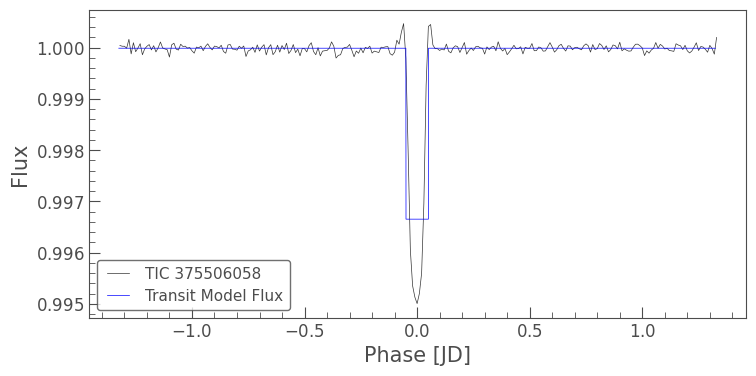

In [144]:
foldlc = flatlc.fold(period=2.6504294074088195,epoch_time=1712.6770163050617)
foldlc = foldlc.bin(time_bin_size=0.01)
ax = foldlc.plot()

transmodel = per.get_transit_model(period=per.period_at_max_power,\
                                   transit_time = per.transit_time_at_max_power,\
                                    duration=per.duration_at_max_power)
modelfold = transmodel.fold(per.period_at_max_power,per.transit_time_at_max_power)
modelfold.plot(ax=ax,color="blue")
plt.show()


In [ ]:
#The boxcar model fits the period and duration well, but does not match the transit depth